In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
# Read in data
dataNp = np.loadtxt(open("N2onMachTest.csv", "r"), delimiter=",", skiprows=1)
dataNp = np.delete(dataNp, 1, 1)
dataNp = np.delete(dataNp, 1, 1)
dataNp = np.delete(dataNp, 1, 1)
dataNp = np.delete(dataNp, 1, 1)
dataNp = np.delete(dataNp, 1, 1)

In [65]:
# Constants
max_thrust = 62000
max_EPR = 1.6432
idle_thrust = 2170
idle_epr = 1.02282
k = 0.3

n1s = np.linspace(20,110,19)
n1s = np.insert(n1s, 0, 0)

In [66]:
# Thrust function
thrust = lambda epr, mach: (idle_thrust + (max_thrust - idle_thrust) * ((epr - idle_epr) / (max_EPR - idle_epr))) * (1 - k * mach)

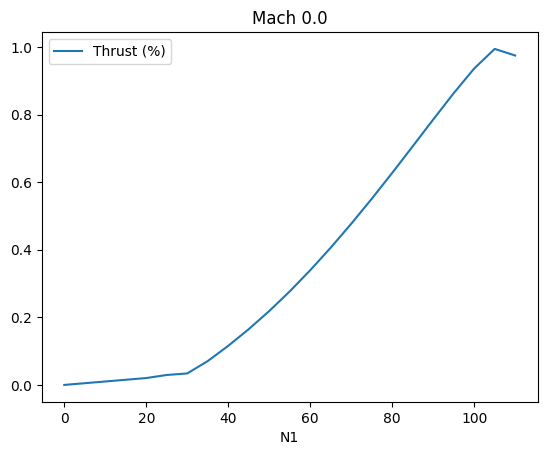

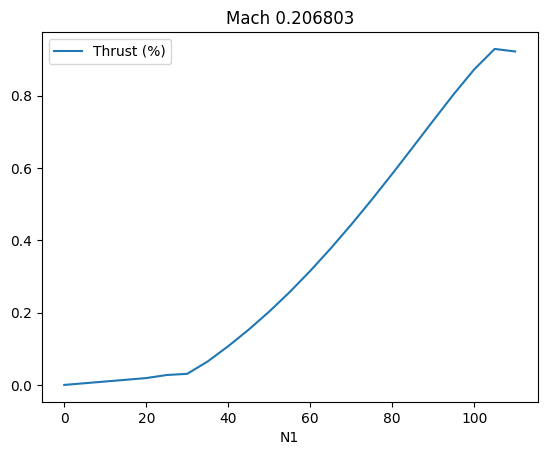

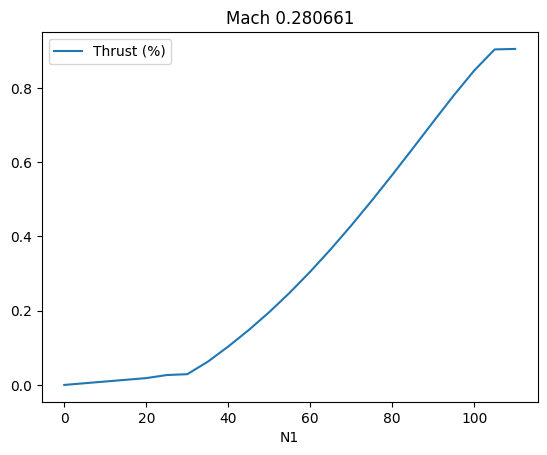

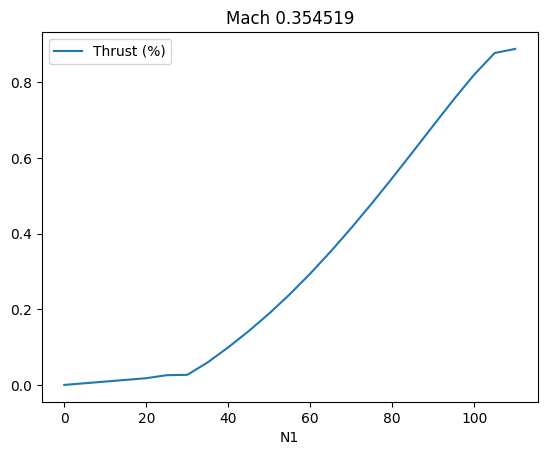

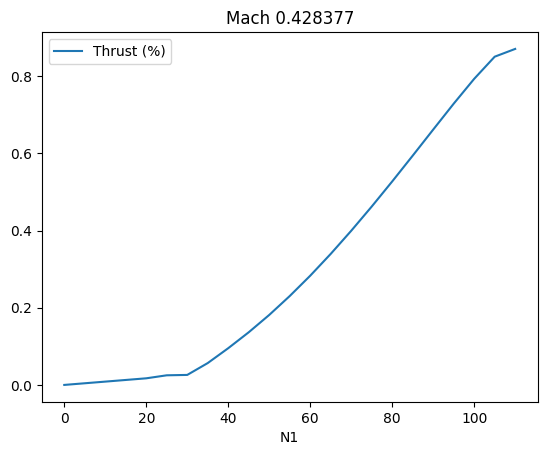

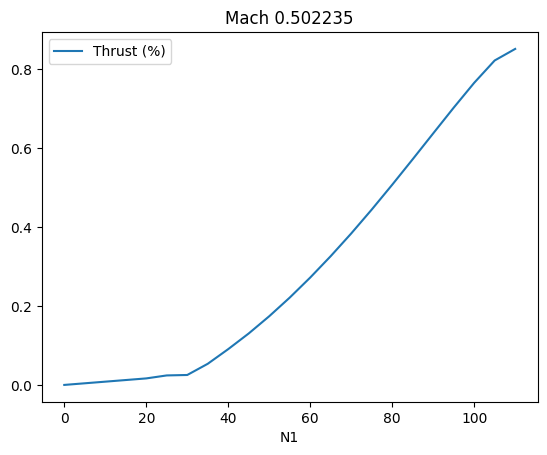

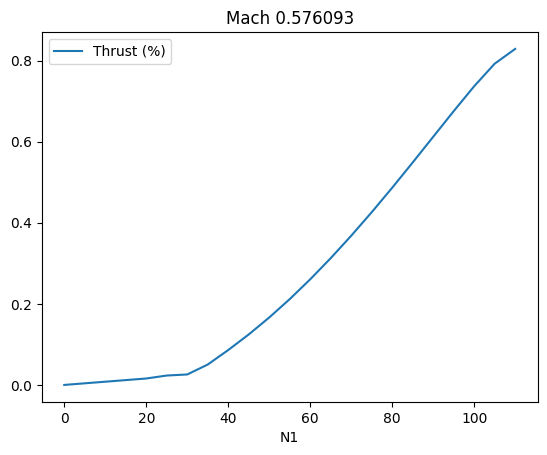

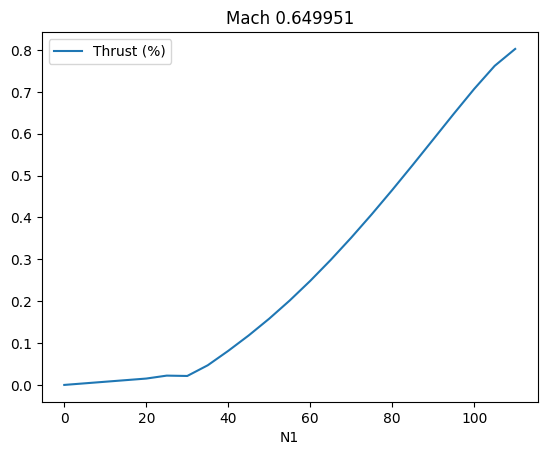

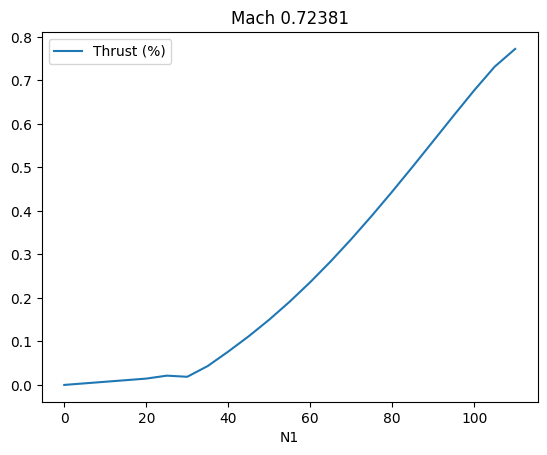

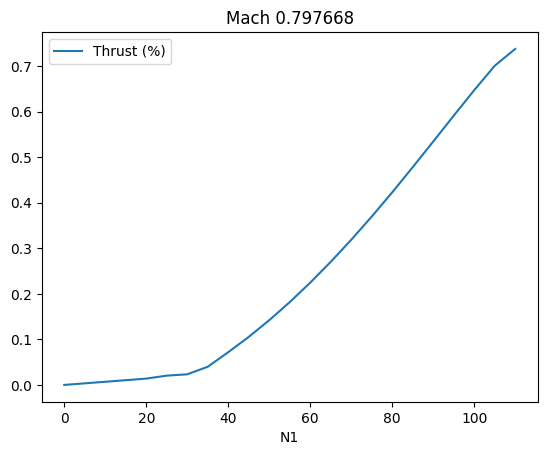

In [67]:
# Generate and plot

LUTs = {}
count = 0
for i in range(0, 3025, 55):
  if count != 0 and count < 10:
    count += 1
    continue
  if count > 0 and (count + 1) % 5 != 0:
    count +=1
    continue

  # Data
  MACH = dataNp[:, 0][i:i + 1][0]
  N1 = dataNp[:, 1][i:i + 55]
  EPR = dataNp[:, 2][i:i+55]

  # Interpolation
  interp = np.interp(n1s, N1, thrust(EPR, MACH) / max_thrust)

  # Calculate the LUT: N1 vs. thrust using linear interpolation
  LUT = pd.DataFrame({
      'N1': n1s,
      'Thrust (%)': interp
  })
  LUT.loc[0] = [0,0]

  LUTs[MACH] = LUT

  ax = LUT.plot.line(x="N1", y="Thrust (%)")
  ax.set_title(f"Mach {MACH}")

  count += 1

plt.show()

In [69]:
# Output for MSFS

outputDict = {}

for mach in LUTs:
  lut = LUTs[mach]
  _n1s = lut["N1"].values
  scalars = lut["Thrust (%)"].values


  
  for i in range(len(_n1s)):
    n1 = _n1s[i]

    key = "{0:6f}".format(n1)
    if key not in outputDict:
      outputDict[key] = {}

    _key = "{0:6f}".format(mach)
    if _key not in outputDict[key]:
      outputDict[key][_key] = []
    outputDict[key][_key] = "{0:6f}".format(scalars[i])

header = True
output = "0.000000"
for key in outputDict:
  row = outputDict[key]
  # Machs
  if header:
    header = False
    for _key in row:
      output += "," + _key
    output += "\n"
  # Entries
  output += key
  for _key in row:
    output += "," + row[_key]
  output += "\n"

print(output)

0.000000,0.000000,0.206803,0.280661,0.354519,0.428377,0.502235,0.576093,0.649951,0.723810,0.797668
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20.000000,0.020334,0.018926,0.018365,0.017768,0.017149,0.016515,0.015863,0.015208,0.014534,0.013860
25.000000,0.029434,0.027422,0.026632,0.025797,0.024940,0.024059,0.023152,0.022235,0.021306,0.020375
30.000000,0.033986,0.030672,0.028919,0.026653,0.025928,0.025184,0.025802,0.021374,0.018702,0.023291
35.000000,0.070581,0.064962,0.062424,0.059648,0.056670,0.053536,0.050308,0.046924,0.043444,0.039910
40.000000,0.115706,0.107129,0.103436,0.099453,0.095210,0.090734,0.086072,0.081361,0.076653,0.071841
45.000000,0.164968,0.152931,0.147828,0.142341,0.136513,0.130440,0.124498,0.118283,0.111870,0.105388
50.000000,0.218546,0.202746,0.196107,0.188982,0.181423,0.174048,0.166338,0.158287,0.149967,0.142050
55.000000,0.276676,0.256828,0.248552,0.239686,0.230419,0.221263,0.211681,0.201686,0.191443,0.181712
60